# Leap of Faith in PyTorch [L4] - Building a Simple Neural Network (Day 4) - Demo

## 👉 [check it on Medium - Leap of Faith in PyTorch [L4] - Building a Simple Neural Network (Day 4)](https://medium.com/gitconnected/leap-of-faith-in-pytorch-building-a-simple-neural-network-day-4-d38b96a48c0c)

### Step 1: Visual Analysis

[ 0.20294786 -2.09105518  0.89046625  2.65770688  4.49404924  2.6823283
  1.68896121  4.28016686  3.89288653  5.14100348  5.13853919  1.87509813
  2.99925535  1.80638513  3.09236383  3.21045436  2.6379438   2.04990461
  0.99540631 -2.91508624  3.09080637  3.13719439  1.75566133  2.32581357
  2.87346677  0.64997099  1.03855093  3.0338349   2.74296343  1.90843193
 -5.03823344  5.28695689  3.81986634  1.06599445]
[ 0.20294786  3.92025137  5.53345456 -2.99999564  1.88596559]


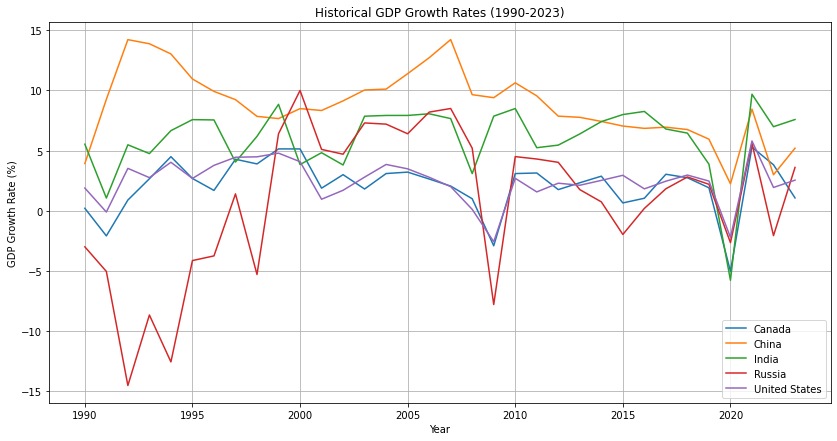

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define years and GDP growth data (annual %)
years = np.arange(1990, 2024)
gdp_growth_data = np.array([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
])


print(gdp_growth_data[0, :])
print(gdp_growth_data[:, 0])
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(years, gdp_growth_data[0, :], label='Canada')
plt.plot(years, gdp_growth_data[1, :], label='China')
plt.plot(years, gdp_growth_data[2, :], label='India')
plt.plot(years, gdp_growth_data[3, :], label='Russia')
plt.plot(years, gdp_growth_data[4, :], label='United States')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Historical GDP Growth Rates (1990-2023)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()


### Step 2: Define the Neural Network

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Input layer to hidden layer
        self.fc2 = nn.Linear(64, 32) # Hidden layer
        self.fc3 = nn.Linear(32, 5)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

### Step 3: Define the Loss Function and Optimizer

In [6]:
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

### Step 4: Train the Model

In [7]:
epochs = 100000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years)
    loss = criterion(outputs, gdp_growth_data)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 14784.0693359375
Epoch 100, Loss: 12.005861282348633
Epoch 200, Loss: 11.874539375305176
Epoch 300, Loss: 11.874526023864746
Epoch 400, Loss: 11.87452507019043
Epoch 500, Loss: 11.874532699584961
Epoch 600, Loss: 11.87452507019043
Epoch 700, Loss: 11.87452507019043
Epoch 800, Loss: 11.874520301818848
Epoch 900, Loss: 11.874505996704102
Epoch 1000, Loss: 11.874519348144531
Epoch 1100, Loss: 11.874509811401367
Epoch 1200, Loss: 11.874483108520508
Epoch 1300, Loss: 11.874494552612305
Epoch 1400, Loss: 11.874495506286621
Epoch 1500, Loss: 11.874486923217773
Epoch 1600, Loss: 11.874471664428711
Epoch 1700, Loss: 11.874483108520508
Epoch 1800, Loss: 11.87446117401123
Epoch 1900, Loss: 11.874466896057129
Epoch 2000, Loss: 11.8744478225708
Epoch 2100, Loss: 11.874464988708496
Epoch 2200, Loss: 11.874431610107422
Epoch 2300, Loss: 11.874432563781738
Epoch 2400, Loss: 11.874412536621094
Epoch 2500, Loss: 11.874409675598145
Epoch 2600, Loss: 11.874398231506348
Epoch 2700, Loss: 11.

### Step 5: Make Predictions and Plot Results

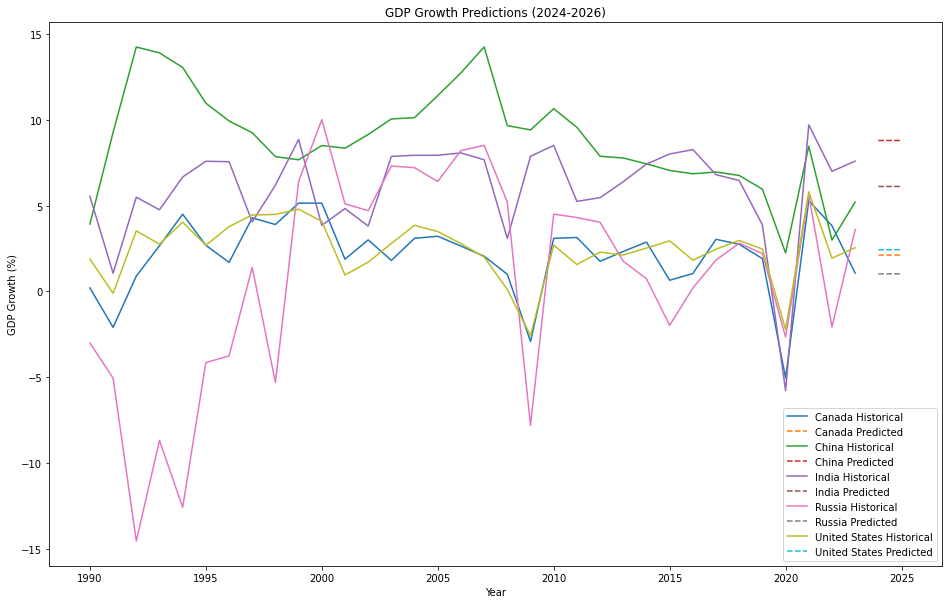

In [8]:
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2026), dtype=torch.float32).view(-1, 1)
    predictions = model(future_years)

plt.figure(figsize=(16, 10))

# Plot results
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), predictions[:, i].numpy(), linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth Predictions (2024-2026)')
plt.legend()
plt.show()


## Steps 1 - 6: All In One

Epoch 0, Loss: 845.96826171875
Epoch 100, Loss: 1.5816078186035156
Epoch 200, Loss: 1.5533597469329834
Epoch 300, Loss: 1.5267012119293213
Epoch 400, Loss: 1.5015324354171753
Epoch 500, Loss: 1.477760910987854
Epoch 600, Loss: 1.455300211906433
Epoch 700, Loss: 1.4340697526931763
Epoch 800, Loss: 1.4139946699142456
Epoch 900, Loss: 1.3950046300888062
Trained Parameters (slope): Parameter containing:
tensor([[ 0.0009, -0.0005,  0.0007,  0.0010,  0.0008]], requires_grad=True)
Trained Intercepts: Parameter containing:
tensor([[-0.0421,  0.2486,  0.1290, -0.1795, -0.0102]], requires_grad=True)
Future GDP Growth Predictions (Denormalized):
 [[-15.716724   -7.3938327 -10.799738  -19.662287  -14.801555 ]
 [-15.715979   -7.3942323 -10.7991495 -19.661396  -14.800851 ]
 [-15.715232   -7.3946323 -10.798561  -19.660503  -14.800146 ]]


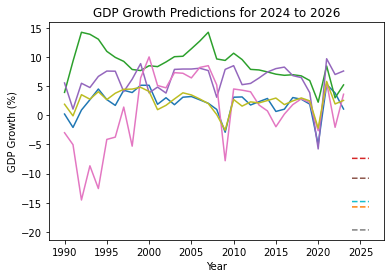

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()

# Normalize data
gdp_data_min = gdp_growth_data.min()
gdp_data_max = gdp_growth_data.max()
gdp_growth_normalized = (gdp_growth_data - gdp_data_min) / (gdp_data_max - gdp_data_min)

# Initialize model parameters
num_countries = gdp_growth_data.size(1)
params = torch.nn.Parameter(torch.randn(1, num_countries) * 0.01)  # Adjusted for num_countries
intercepts = torch.nn.Parameter(torch.zeros(1, num_countries))

# Define model and loss
def linear_model(x, params, intercepts):
    return x @ params + intercepts

def mse_loss(pred, target):
    return ((pred - target) ** 2).mean()

# Training parameters
learning_rate = 0.001
epochs = 1000

for epoch in range(epochs):
    # Zero gradients
    params.grad = None
    intercepts.grad = None
    
    # Forward pass
    predicted_gdp = linear_model(years, params, intercepts)
    loss = mse_loss(predicted_gdp, gdp_growth_normalized)
    
    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        params.grad.data.clamp_(-1, 1)
        intercepts.grad.data.clamp_(-1, 1)
        params -= learning_rate * params.grad
        intercepts -= learning_rate * intercepts.grad
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Trained Parameters (slope):", params)
print("Trained Intercepts:", intercepts)

# Predict future GDP growth
future_years = torch.tensor(np.arange(2024, 2027), dtype=torch.float32).view(-1, 1)
future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
future_gdp_growth_predictions = linear_model(future_years_normalized, params, intercepts)

# Denormalize predictions
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions * (gdp_data_max - gdp_data_min) + gdp_data_min

# Ensure tensor is correctly shaped
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions_denorm.detach().numpy()
print("Future GDP Growth Predictions (Denormalized):\n", future_gdp_growth_predictions_denorm)

# Plot results
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].detach().numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), future_gdp_growth_predictions_denorm[:, i], linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth Predictions for 2024 to 2026')
# plt.legend()
plt.show()
